In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

## Tobit

In [705]:
yL = 25
sigma = 5

In [701]:
y = 5 # GPS Distance
y_hat = np.linspace(0.01, 50, num=100) # Embedding distance
indicator = int(y < yL)

In [702]:
y = 10 # GPS Distance
indicator = int(y < yL)
L_pos = ((1/sigma * norm.pdf((y-y_hat)/sigma))**indicator) * (1-norm.cdf((y_hat - yL)/sigma))**(1-indicator)

y = 30 # GPS Distance
indicator = int(y < yL)
L_neg = ((1/sigma * norm.pdf((y-y_hat)/sigma))**indicator) * (1-norm.cdf((y_hat - yL)/sigma))**(1-indicator)


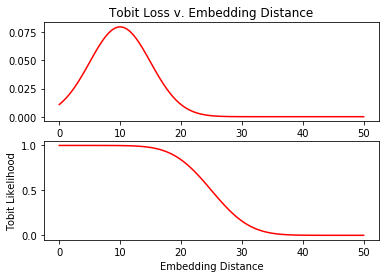

In [703]:
fig, ax = plt.subplots(2, 1)
ax[0].set_title('Tobit Loss v. Embedding Distance')
ax[0].plot(y_hat,L_pos,'r-')
ax[1].set_xlabel('Embedding Distance')
ax[1].set_ylabel('Tobit Likelihood')
ax[1].plot(y_hat, L_neg,'r-')

Thoughts: 

* On the bottom graph, if a negative point is REALLY close, the gradient will be quite small right? The biggest gradient is actually until x = 25, which is the threshold. Is that ideal? It could also happen if sigma is not scaled large enough.

* Shouldn't the top graph be flipped upside down? If we try to minimize this, we will "push" away points > 10. 



## Contrastive

In [6]:
NUM_POINTS = 1000
yL = 25 # meter pos/neg threshold
margin_thr = 0.6 # latent space margin

In [46]:
y = np.linspace(1, 50, num=NUM_POINTS) # GPS Distance
Dw = np.linspace(0.01, 2, num=NUM_POINTS) # Embedding Distances
margin = np.full(NUM_POINTS, margin_thr)

In [47]:
indicator = 0 # => Postive point
L_Pos = ((1-indicator) * 1/2 * Dw**2) + indicator*1/2*((margin-Dw).clip(min=0))**2
indicator = 1 # => Negative point
L_Neg= (1-indicator) * 1/2 * Dw**2 + indicator*1/2*((margin-Dw).clip(min=0))**2

In [57]:
s = 0.7 / 25 * 10

indicator = 0 # => Postive point
L_Pos = ((1-indicator) * 1/2 * (Dw-s)**2) + indicator*1/2*((margin-Dw).clip(min=0))**2
indicator = 1 # => Negative point
L_Neg= (1-indicator) * 1/2 * Dw**2 + indicator*1/2*((margin-Dw).clip(min=0))**2

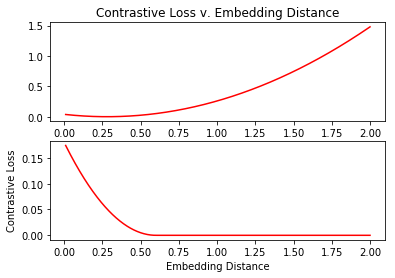

In [58]:
fig, ax = plt.subplots(2, 1)
ax[0].set_title('Contrastive Loss v. Embedding Distance')
ax[0].plot(Dw, L_Pos,'r-')
ax[1].set_xlabel('Embedding Distance')
ax[1].set_ylabel('Contrastive Loss')
ax[1].plot(Dw, L_Neg,'r-')